In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# Step 1: Load Cleaned Data
df = pd.read_csv("../data/cleaned_online_retail.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


C:\Users\tanus\AppData\Local\Temp\ipykernel_5812\2723397596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


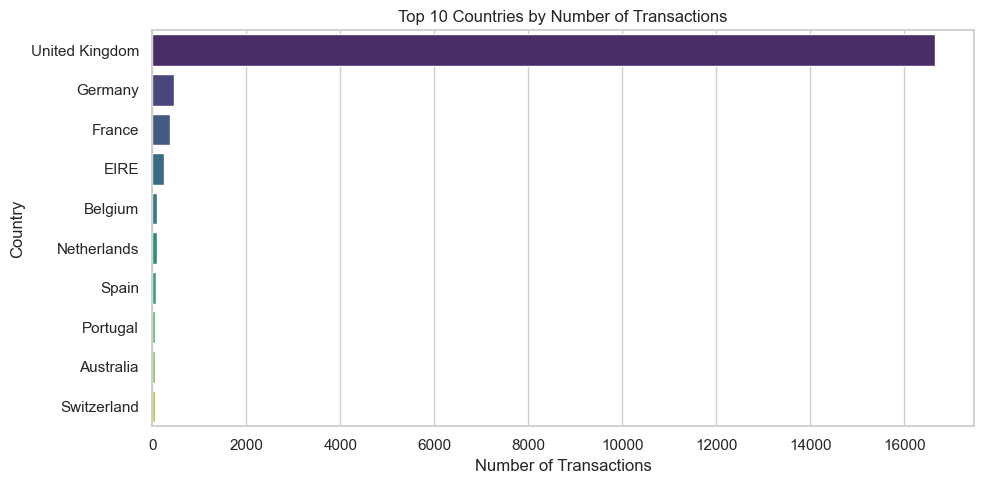

In [3]:
# Step 2: Top Countries by Number of Transactions
top_countries = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


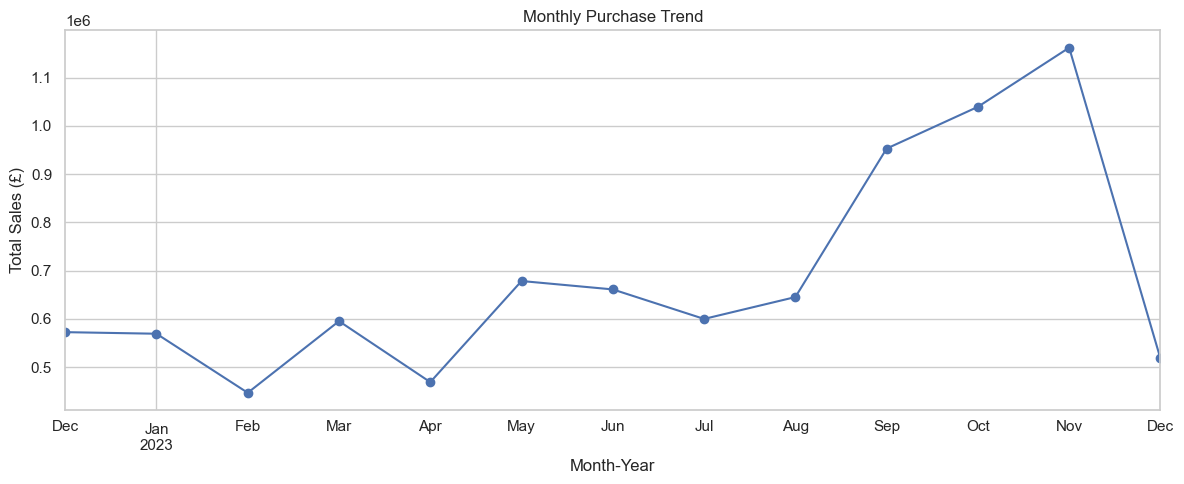

In [4]:
# Step 3: Monthly Purchase Trend (Time Series)
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['TotalPrice'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Purchase Trend")
plt.ylabel("Total Sales (£)")
plt.xlabel("Month-Year")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\tanus\AppData\Local\Temp\ipykernel_5812\412181723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')


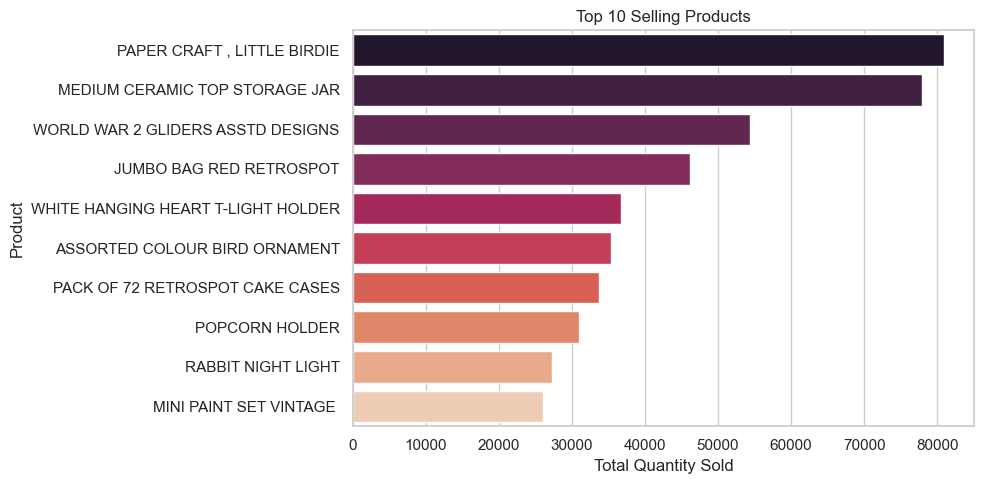

In [5]:
# Step 4: Top-Selling Products by Quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


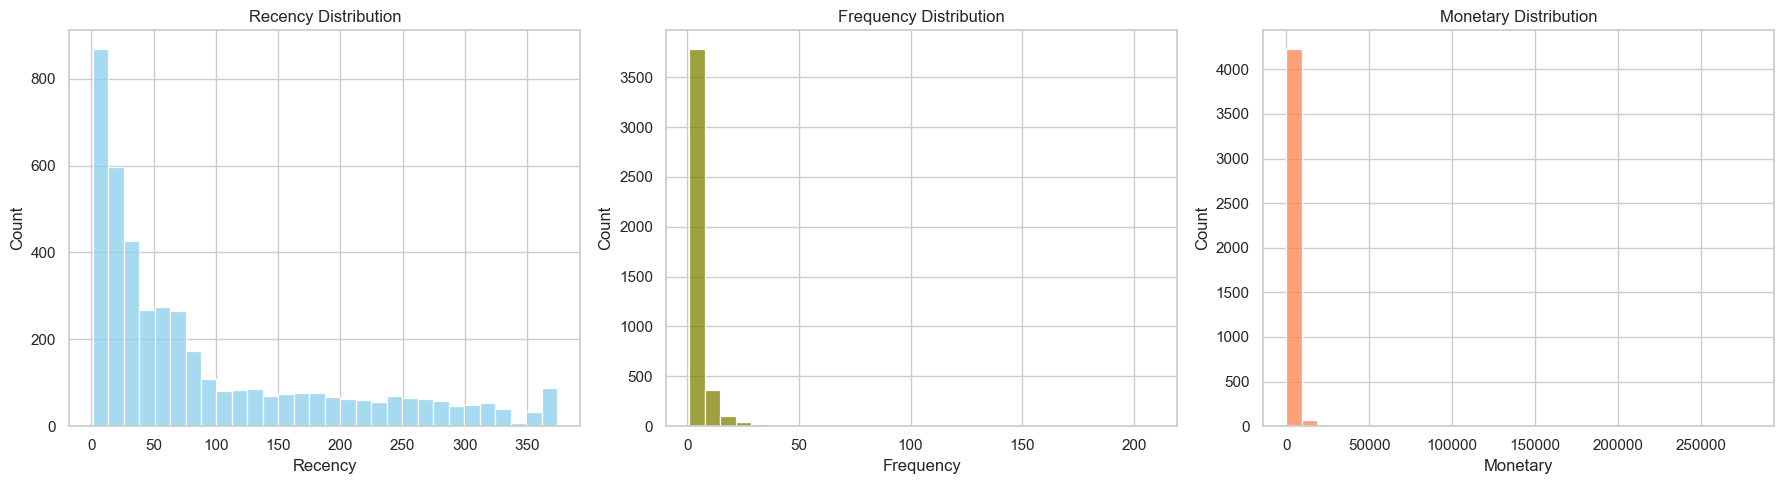

In [6]:
# Step 5: RFM Score Distributions
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Plotting Distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=30, ax=ax[0], color='skyblue')
ax[0].set_title("Recency Distribution")

sns.histplot(rfm['Frequency'], bins=30, ax=ax[1], color='olive')
ax[1].set_title("Frequency Distribution")

sns.histplot(rfm['Monetary'], bins=30, ax=ax[2], color='coral')
ax[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()


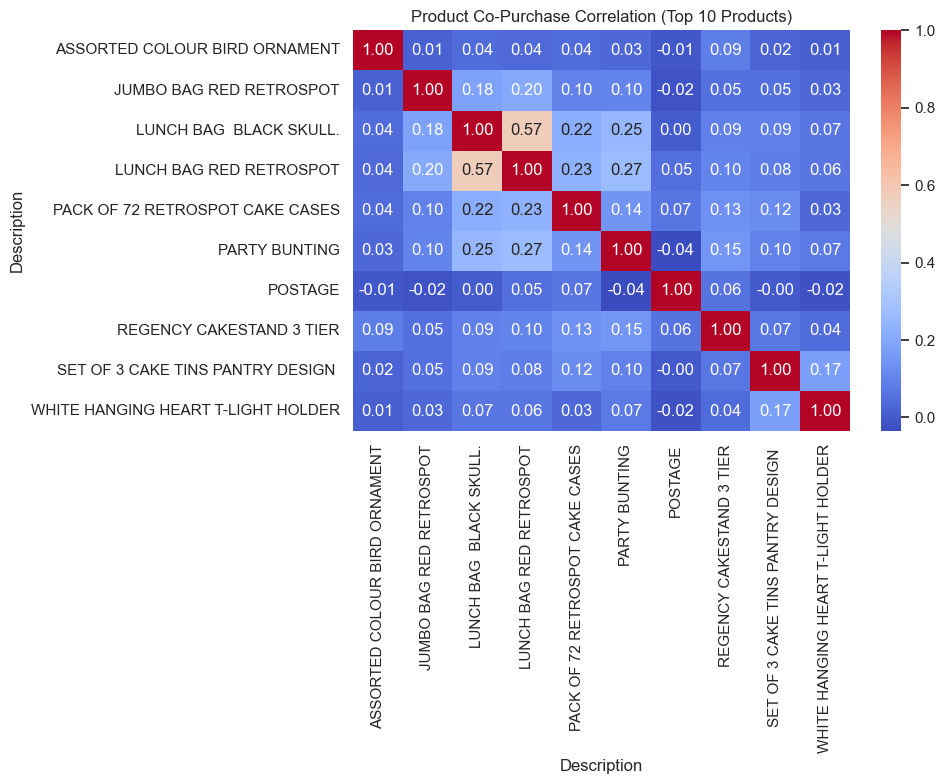

In [7]:
# Step 6: Product Co-Purchase Heatmap
# Pivot table of customer vs top 10 products
top10_products = df['Description'].value_counts().head(10).index
pivot = df[df['Description'].isin(top10_products)].pivot_table(
    index='CustomerID', columns='Description', values='Quantity', fill_value=0
)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Product Co-Purchase Correlation (Top 10 Products)")
plt.tight_layout()
plt.show()


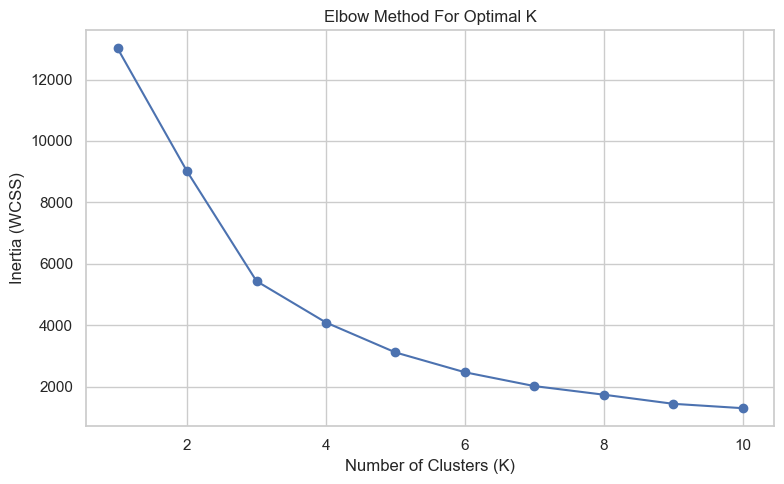

In [8]:
# Step 7: Elbow Method for Optimal Clusters (for KMeans in Phase 4)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method For Optimal K")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
'''
* EDA Summary:
- UK has the most transactions (unsurprisingly).
- Sales are seasonal and peak in certain months.
- A few products dominate overall purchases.
- RFM distribution shows heavy tails (most customers are infrequent).
- Co-purchased products are often from related categories.
- Elbow method suggests ideal clusters for segmentation.

(Ready for Phase 4: Customer Segmentation using KMeans!)

'''

'\n* EDA Summary:\n- UK has the most transactions (unsurprisingly).\n- Sales are seasonal and peak in certain months.\n- A few products dominate overall purchases.\n- RFM distribution shows heavy tails (most customers are infrequent).\n- Co-purchased products are often from related categories.\n- Elbow method suggests ideal clusters for segmentation.\n\n(Ready for Phase 4: Customer Segmentation using KMeans!)\n\n'